In [61]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('TMDB_tv_dataset_v3.csv')
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158566 entries, 0 to 158565
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    158566 non-null  int64  
 1   name                  158561 non-null  object 
 2   number_of_seasons     158566 non-null  int64  
 3   number_of_episodes    158566 non-null  int64  
 4   original_language     158566 non-null  object 
 5   vote_count            158566 non-null  int64  
 6   vote_average          158566 non-null  float64
 7   overview              89357 non-null   object 
 8   adult                 158566 non-null  bool   
 9   backdrop_path         74263 non-null   object 
 10  first_air_date        128542 non-null  object 
 11  last_air_date         130608 non-null  object 
 12  homepage              49380 non-null   object 
 13  in_production         158566 non-null  bool   
 14  original_name         158561 non-null  object 
 15  

In [64]:
df_columns = df.columns.to_list()
df_columns

['id',
 'name',
 'number_of_seasons',
 'number_of_episodes',
 'original_language',
 'vote_count',
 'vote_average',
 'overview',
 'adult',
 'backdrop_path',
 'first_air_date',
 'last_air_date',
 'homepage',
 'in_production',
 'original_name',
 'popularity',
 'poster_path',
 'type',
 'status',
 'tagline',
 'genres',
 'created_by',
 'languages',
 'networks',
 'origin_country',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'episode_run_time']

# dealind with Nans values

In [65]:
Nans_columns = []
for col in df_columns:
    if df[col].isna().sum() > 5:
        Nans_columns.append(col)
    

In [66]:
Nans_columns

['overview',
 'backdrop_path',
 'first_air_date',
 'last_air_date',
 'homepage',
 'poster_path',
 'tagline',
 'genres',
 'created_by',
 'languages',
 'networks',
 'origin_country',
 'spoken_languages',
 'production_companies',
 'production_countries']

In [67]:
df[Nans_columns].isna().agg(sum)

overview                 69209
backdrop_path            84303
first_air_date           30024
last_air_date            27958
homepage                109186
poster_path              56289
tagline                 153355
genres                   64087
created_by              123726
languages                53602
networks                 64588
origin_country           31014
spoken_languages         54310
production_companies    101971
production_countries     85010
dtype: int64

In [68]:
for col in Nans_columns:
    df.drop(columns=col,inplace=True)

In [69]:
df.isna().sum()

id                    0
name                  5
number_of_seasons     0
number_of_episodes    0
original_language     0
vote_count            0
vote_average          0
adult                 0
in_production         0
original_name         5
popularity            0
type                  0
status                0
episode_run_time      0
dtype: int64

In [70]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,original_name,popularity,type,status,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,False,False,Game of Thrones,1083.917,Scripted,Ended,0
1,71446,Money Heist,3,41,es,17836,8.257,False,False,La Casa de Papel,96.354,Scripted,Ended,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,True,Stranger Things,185.711,Scripted,Returning Series,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,False,The Walking Dead,489.746,Scripted,Ended,42
4,63174,Lucifer,6,93,en,13870,8.486,False,False,Lucifer,416.668,Scripted,Ended,45


In [71]:
df.dropna(inplace=True)

In [72]:
df.duplicated(subset='name').sum()

8808

In [73]:
df.drop_duplicates(subset='name',inplace=True)

In [74]:
Nans_columns

['overview',
 'backdrop_path',
 'first_air_date',
 'last_air_date',
 'homepage',
 'poster_path',
 'tagline',
 'genres',
 'created_by',
 'languages',
 'networks',
 'origin_country',
 'spoken_languages',
 'production_companies',
 'production_countries']

In [75]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,original_name,popularity,type,status,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,False,False,Game of Thrones,1083.917,Scripted,Ended,0
1,71446,Money Heist,3,41,es,17836,8.257,False,False,La Casa de Papel,96.354,Scripted,Ended,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,True,Stranger Things,185.711,Scripted,Returning Series,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,False,The Walking Dead,489.746,Scripted,Ended,42
4,63174,Lucifer,6,93,en,13870,8.486,False,False,Lucifer,416.668,Scripted,Ended,45


what is longest 10 shows by number of seasons

In [76]:
data1 = df[['name','number_of_seasons']].nlargest(10, columns='number_of_seasons')
data1

,name,number_of_seasons
7088,House Hunters,240
7977,House Hunters International,188
39984,Paris By Night,134
43354,Mozalan,101
61857,BBC Proms,95
16915,Pili,84
10118,Golden Globe Awards,80
17642,The Emmy Awards,75
40009,Macy's Thanksgiving Day Parade,75
64582,Ek Rishta Saajhedari Ka,75


([], [])

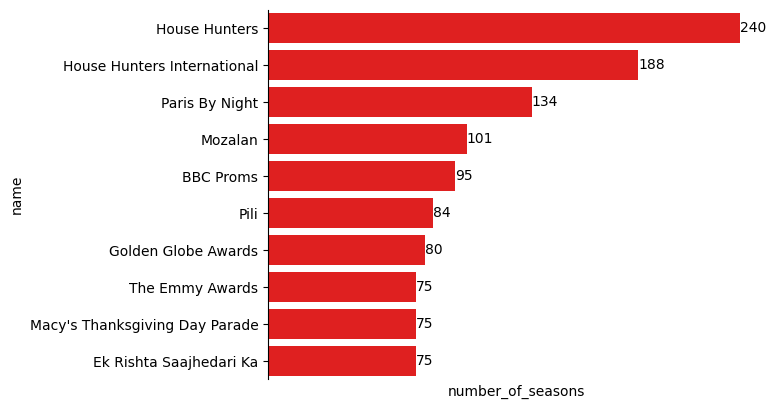

In [77]:
ax = sns.barplot(data=data1, x='number_of_seasons', y='name', color='r')
ax.bar_label(ax.containers[0])
sns.despine(bottom=True)
plt.xticks([],[])

In [78]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,original_name,popularity,type,status,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,False,False,Game of Thrones,1083.917,Scripted,Ended,0
1,71446,Money Heist,3,41,es,17836,8.257,False,False,La Casa de Papel,96.354,Scripted,Ended,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,True,Stranger Things,185.711,Scripted,Returning Series,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,False,The Walking Dead,489.746,Scripted,Ended,42
4,63174,Lucifer,6,93,en,13870,8.486,False,False,Lucifer,416.668,Scripted,Ended,45


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149753 entries, 0 to 158565
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  149753 non-null  int64  
 1   name                149753 non-null  object 
 2   number_of_seasons   149753 non-null  int64  
 3   number_of_episodes  149753 non-null  int64  
 4   original_language   149753 non-null  object 
 5   vote_count          149753 non-null  int64  
 6   vote_average        149753 non-null  float64
 7   adult               149753 non-null  bool   
 8   in_production       149753 non-null  bool   
 9   original_name       149753 non-null  object 
 10  popularity          149753 non-null  float64
 11  type                149753 non-null  object 
 12  status              149753 non-null  object 
 13  episode_run_time    149753 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 15.1+ MB


# what is the most 10 pupular shows

In [80]:
data2 = df[['popularity','name']].nlargest(10,columns='popularity')
data2

,popularity,name
1770,3707.008,The Late Show with Stephen Colbert
3051,3065.138,Batang Quiapo
2284,3049.228,Tagesschau
3582,2898.984,The Late Late Show with Craig Ferguson
4591,2747.685,The Tonight Show Starring Johnny Carson
4645,2593.643,Chronicles of the Sun
1596,2419.997,The Tonight Show Starring Jimmy Fallon
8823,2278.406,Pira-Pirasong Paraiso
7317,2232.167,Come Home Love: Lo and Behold
4306,2207.068,Revenge is mine


Text(0.5, 1.0, 'the top popular show')

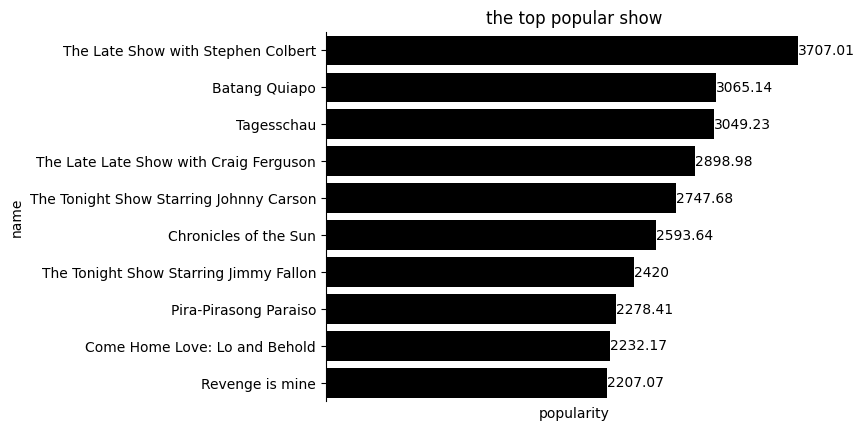

In [81]:
ax = sns.barplot(data=data2, x='popularity', y='name', color='black')
ax.bar_label(ax.containers[0])
sns.despine(bottom=True)
plt.xticks([],[])
plt.title('the top popular show')

In [82]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,original_name,popularity,type,status,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,False,False,Game of Thrones,1083.917,Scripted,Ended,0
1,71446,Money Heist,3,41,es,17836,8.257,False,False,La Casa de Papel,96.354,Scripted,Ended,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,True,Stranger Things,185.711,Scripted,Returning Series,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,False,The Walking Dead,489.746,Scripted,Ended,42
4,63174,Lucifer,6,93,en,13870,8.486,False,False,Lucifer,416.668,Scripted,Ended,45


# applying value_counts to status colomns

In [83]:
data3 = df['status'].value_counts().reset_index()
data3

,status,count
0,Ended,85331
1,Returning Series,58119
2,Canceled,3984
3,In Production,1720
4,Planned,406
5,Pilot,193


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ended'),
  Text(1, 0, 'Returning Series'),
  Text(2, 0, 'Canceled'),
  Text(3, 0, 'In Production'),
  Text(4, 0, 'Planned'),
  Text(5, 0, 'Pilot')])

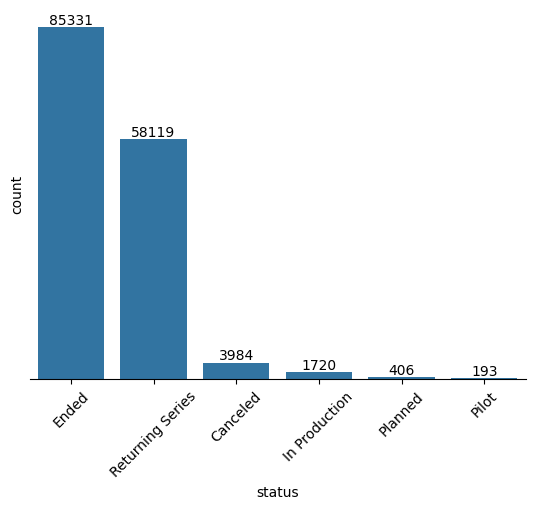

In [84]:
ax = sns.barplot(data3, x='status', y='count')
ax.bar_label(ax.containers[0])
sns.despine(left=True)
plt.yticks([],[])
plt.xticks(rotation=45)

In [85]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,original_name,popularity,type,status,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,False,False,Game of Thrones,1083.917,Scripted,Ended,0
1,71446,Money Heist,3,41,es,17836,8.257,False,False,La Casa de Papel,96.354,Scripted,Ended,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,True,Stranger Things,185.711,Scripted,Returning Series,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,False,The Walking Dead,489.746,Scripted,Ended,42
4,63174,Lucifer,6,93,en,13870,8.486,False,False,Lucifer,416.668,Scripted,Ended,45


In [86]:
data4 = df.groupby('original_language').agg({'popularity' : 'max'}).reset_index()
data4

,original_language,popularity
0,aa,0.605
1,ab,12.672
2,af,1977.475
3,am,9.461
4,ar,48.569
...,...,...
100,vi,426.947
101,xx,86.667
102,za,1.531
103,zh,2071.972


# lineplot for ariginal_language and popularity

In [87]:
data4 = data4.nlargest(10,columns='popularity')
data4

,original_language,popularity
20,en,3707.008
94,tl,3065.138
17,de,3049.228
27,fr,2593.643
13,cn,2232.167
22,es,2207.068
103,zh,2071.972
2,af,1977.475
95,tr,1968.201
75,pt,1937.067


<Axes: xlabel='original_language', ylabel='popularity'>

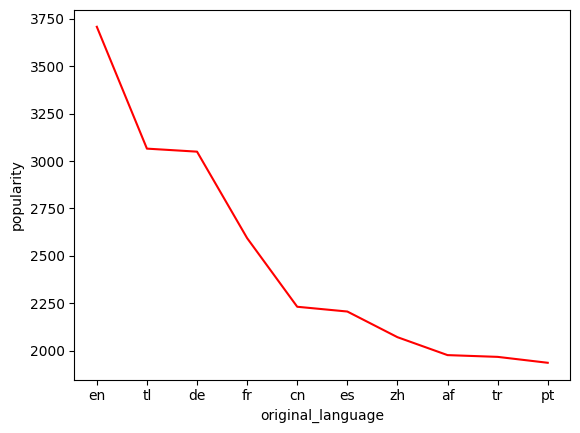

In [88]:
sns.lineplot(data4,x='original_language', y='popularity',color='r')